In [1]:
import numpy as np  
import pandas as pd  
from pandas_datareader import data as wb  
import matplotlib.pyplot as plt  
from scipy.stats import norm
%matplotlib inline

In [2]:
ticker = 'PG' 
data = pd.DataFrame()
data[ticker] = wb.DataReader(ticker, data_source='yahoo', start='2007-1-1')['Adj Close']

log_returns = np.log(1 + data.pct_change())

In [3]:
log_returns.tail()

,PG
Date,
2017-03-29,-0.001764
2017-03-30,-0.004425
2017-03-31,-0.003888
2017-04-03,-0.001894
2017-04-04,0.002561


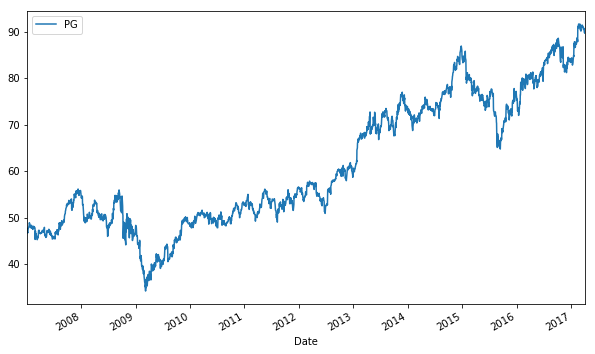

In [4]:
data.plot(figsize=(10, 6));

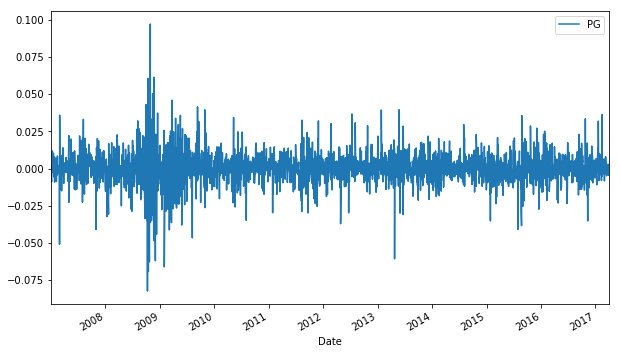

In [5]:
log_returns.plot(figsize = (10, 6))

In [6]:
u = log_returns.mean()
u

PG    0.000247
dtype: float64

In [7]:
var = log_returns.var()
var

PG    0.000124
dtype: float64

In [8]:
drift = u - (0.5 * var)
drift

PG    0.000184
dtype: float64

In [9]:
stdev = log_returns.std()
stdev

PG    0.011146
dtype: float64

******

In [10]:
type(drift)

pandas.core.series.Series

In [11]:
type(stdev)

pandas.core.series.Series

In [12]:
np.array(drift)

array([ 0.00018447])

In [13]:
drift.values

array([ 0.00018447])

In [14]:
stdev.values

array([ 0.01114576])

In [15]:
norm.ppf(0.95)

1.6448536269514722

In [16]:
x = np.random.rand(10, 2)
x

array([[ 0.63205078,  0.50909456],
       [ 0.97937864,  0.50201587],
       [ 0.97218307,  0.70632381],
       [ 0.10559273,  0.33868293],
       [ 0.2945058 ,  0.46976469],
       [ 0.54819784,  0.7623202 ],
       [ 0.52672075,  0.24589045],
       [ 0.06731627,  0.15447646],
       [ 0.58848943,  0.32032789],
       [ 0.18214381,  0.85713362]])

In [17]:
norm.ppf(x)

array([[ 0.33728982,  0.02279864],
       [ 2.04108162,  0.00505307],
       [ 1.91389271,  0.54267675],
       [-1.25031237, -0.41606031],
       [-0.5402689 , -0.07586139],
       [ 0.12110949,  0.71378588],
       [ 0.06702914, -0.68747905],
       [-1.49608103, -1.01742159],
       [ 0.22366095, -0.4667821 ],
       [-0.90722538,  1.06752959]])

In [18]:
Z = norm.ppf(np.random.rand(10,2))
Z

array([[ 0.12884667, -1.53308181],
       [ 0.06827676, -0.69560468],
       [-0.41802522, -0.99565076],
       [-0.43955019,  0.10132395],
       [-1.2764183 ,  0.52660144],
       [-0.16565672,  1.86962668],
       [ 1.28330436,  0.26540823],
       [ 1.05125603, -0.99368368],
       [ 1.11765827, -1.5188907 ],
       [ 1.46457484,  1.68962242]])

In [19]:
t_intervals = 1000
iterations = 10

daily_returns = np.exp(drift.values + stdev.values * norm.ppf(np.random.rand(t_intervals, iterations)))

In [20]:
daily_returns

array([[ 0.98937353,  0.99750229,  0.99768282, ...,  1.01063178,
         1.00460336,  1.01593352],
       [ 1.00135053,  1.00067307,  1.03147937, ...,  0.98444899,
         0.97785299,  0.99039446],
       [ 1.00726075,  1.01632261,  0.98983404, ...,  1.00072913,
         0.99524209,  1.01722329],
       ..., 
       [ 0.99535679,  0.99159338,  0.99879138, ...,  0.98928957,
         0.99355641,  1.01113353],
       [ 1.01916555,  1.00078594,  0.9762182 , ...,  0.99604913,
         1.00106856,  0.99202117],
       [ 0.98364684,  0.99233546,  1.00083122, ...,  1.01132516,
         1.01570296,  0.99228213]])

***

In [21]:
S0 = data.iloc[-1]
S0

PG    89.910004
Name: 2017-04-04 00:00:00, dtype: float64

In [22]:
price_list = np.zeros_like(daily_returns)

In [23]:
price_list

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [24]:
price_list[0]

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])

In [25]:
price_list[0] = S0
price_list

array([[ 89.910004,  89.910004,  89.910004, ...,  89.910004,  89.910004,
         89.910004],
       [  0.      ,   0.      ,   0.      , ...,   0.      ,   0.      ,
          0.      ],
       [  0.      ,   0.      ,   0.      , ...,   0.      ,   0.      ,
          0.      ],
       ..., 
       [  0.      ,   0.      ,   0.      , ...,   0.      ,   0.      ,
          0.      ],
       [  0.      ,   0.      ,   0.      , ...,   0.      ,   0.      ,
          0.      ],
       [  0.      ,   0.      ,   0.      , ...,   0.      ,   0.      ,
          0.      ]])

In [26]:
for t in range(1, t_intervals):
    price_list[t] = price_list[t - 1] * daily_returns[t]

In [27]:
price_list

array([[  89.910004  ,   89.910004  ,   89.910004  , ...,   89.910004  ,
          89.910004  ,   89.910004  ],
       [  90.03142978,   89.97051965,   92.74031446, ...,   88.51181299,
          87.91876602,   89.04636951],
       [  90.68512549,   91.43907316,   91.79752012, ...,   88.57634963,
          87.50045632,   90.58004074],
       ..., 
       [ 124.85431283,  115.1097299 ,  104.74026619, ...,   44.31643269,
          97.71546663,   71.77686495],
       [ 127.24721381,  115.20019921,  102.24935446, ...,   44.14134427,
          97.81988112,   71.20416981],
       [ 125.16632031,  114.31724221,  102.3343458 , ...,   44.64125194,
          99.3559425 ,   70.65462515]])

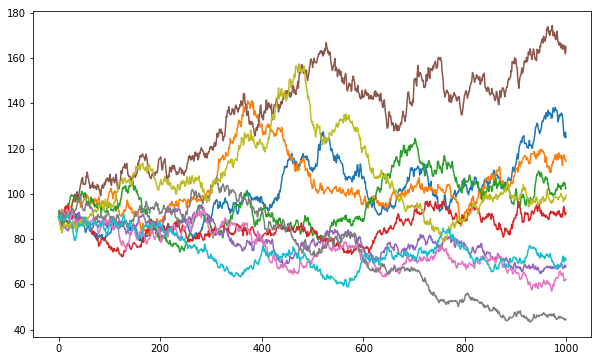

In [28]:
plt.figure(figsize=(10,6))
plt.plot(price_list);